## Exploratory Analysis of Food Sales
#### Nitisha Agarwal 
#### Aug 24, 3023

Eventual goal: Understand customer sales patterns and identify trends relevant to potentially acquiring new customers.
Kaggle Link: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

1. Import modules and read data
2. Initial Exploration: columns, dtypes, info, describe
3. Drop / Rename columns & get numeric cols
4. Missing values / duplicates / outlier detection
5. Create some important/relevant metrics as new columns
6. Boxplots / Pairplot / Correlation for important numeric variables
7. Guiding questions -- do some groupbys, look at distributions
8. Conclusions

### 1. Import modules and read data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
df = pd.read_csv("media prediction and its cost.csv")

### 2. Initial Exploration

In [6]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [7]:
df.iloc[:,10:22].head()

,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight
0,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70
1,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70
2,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70
3,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70
4,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12


In [8]:
df.shape

(60428, 40)

In [9]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [10]:
# What is suggested retail price distribution?
df.SRP.describe()

count    60428.000000
mean         2.115258
std          0.932829
min          0.500000
25%          1.410000
50%          2.130000
75%          2.790000
max          3.980000
Name: SRP, dtype: float64

### 3. Drop / Rename Columns & get numeric cols

In [11]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [12]:
df = df.drop(columns=['avg_cars_at home(approx).1', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case'])

In [13]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [14]:
df.rename(columns={'store_sales(in millions)':'store_sales_mm', 
                   'store_cost(in millions)':'store_cost_mm',
                   'unit_sales(in millions)': 'unit_sales_mm',
                  'avg_cars_at home(approx)': 'avg_cars', 
                  'avg. yearly_income': 'avg_ann_income'}, inplace=True)

In [15]:
df.columns

Index(['food_category', 'food_department', 'food_family', 'store_sales_mm',
       'store_cost_mm', 'unit_sales_mm', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars', 'avg_ann_income',
       'num_children_at_home', 'brand_name', 'SRP', 'store_type', 'store_city',
       'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type', 'cost'],
      dtype='object')

In [16]:
numeric_columns = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]
numeric_columns

['store_sales_mm',
 'store_cost_mm',
 'unit_sales_mm',
 'total_children',
 'avg_cars',
 'num_children_at_home',
 'SRP',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [17]:
non_numeric_columns = [c for c in df.columns if c not in numeric_columns]
non_numeric_columns

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_ann_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [18]:
# shouldn't income be numeric? ohh, different format!
df['avg_ann_income'].head()

0    $10K - $30K
1    $50K - $70K
2    $10K - $30K
3    $30K - $50K
4    $30K - $50K
Name: avg_ann_income, dtype: object

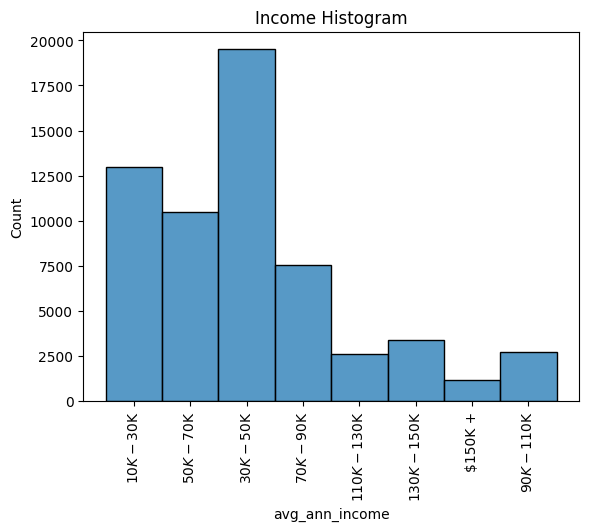

In [19]:
sns.histplot(data=df, x='avg_ann_income')
plt.xticks(rotation=90)
plt.title('Income Histogram')
plt.show()

### 3. Missing Values / Duplicates / Outlier detection

In [20]:
# missing values? - no
df.isnull().sum().sum()

0

In [21]:
# duplicates?
df.duplicated().sum()

0

In [22]:
# outliers for first column
Q1_store_sales = df.store_sales_mm.quantile(0.25)
Q3_store_sales = df.store_sales_mm.quantile(0.75)
IQR_store_sales = Q3_store_sales - Q1_store_sales
threshold = 1.5

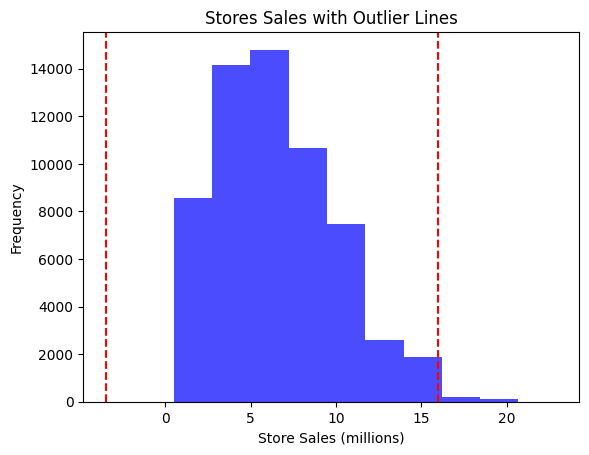

In [23]:
# Values for vertical lines
vertical_lines = [Q1_store_sales - threshold * IQR_store_sales, Q3_store_sales + threshold * IQR_store_sales] 

# Create the histogram
plt.hist(df['store_sales_mm'], bins=10, color='blue', alpha=0.7)

# Add vertical lines
for line in vertical_lines:
    plt.axvline(x=line, color='red', linestyle='--', label=f'Line at {line}')

plt.xlabel('Store Sales (millions)')
plt.ylabel('Frequency')
plt.title('Stores Sales with Outlier Lines')
plt.show()

In [24]:
# all outliers counts

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

dict_outliers = {}
for c in numeric_columns:
    dict_outliers[c] = len(df[(df[c] < (Q1 - threshold * IQR)[c]) | (df[c] > (Q3 + threshold * IQR)[c])])


In [25]:
dict_outliers

{'store_sales_mm': 325,
 'store_cost_mm': 986,
 'unit_sales_mm': 890,
 'total_children': 0,
 'avg_cars': 0,
 'num_children_at_home': 8167,
 'SRP': 0,
 'store_sqft': 0,
 'grocery_sqft': 0,
 'frozen_sqft': 9996,
 'meat_sqft': 9996,
 'coffee_bar': 0,
 'video_store': 0,
 'salad_bar': 0,
 'prepared_food': 0,
 'florist': 0,
 'cost': 0}

<Axes: xlabel='total_children', ylabel='Count'>

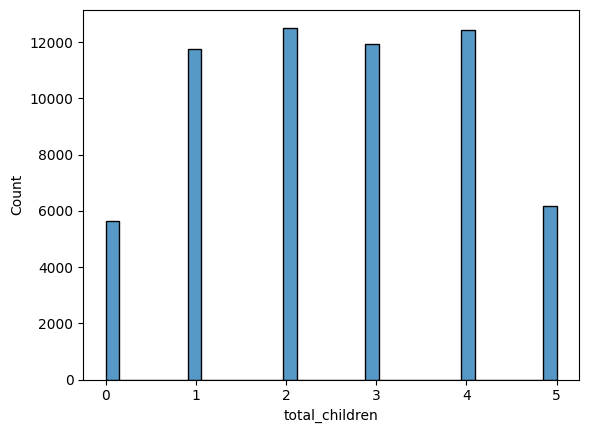

In [26]:
# 'total_children' vs. 'num_children_at_home'
sns.histplot(data=df, x='total_children')

<Axes: xlabel='num_children_at_home', ylabel='Count'>

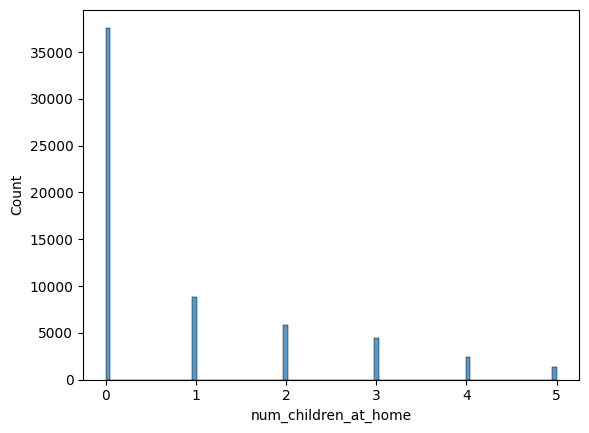

In [27]:
sns.histplot(data=df, x='num_children_at_home')

<Axes: xlabel='meat_sqft', ylabel='Count'>

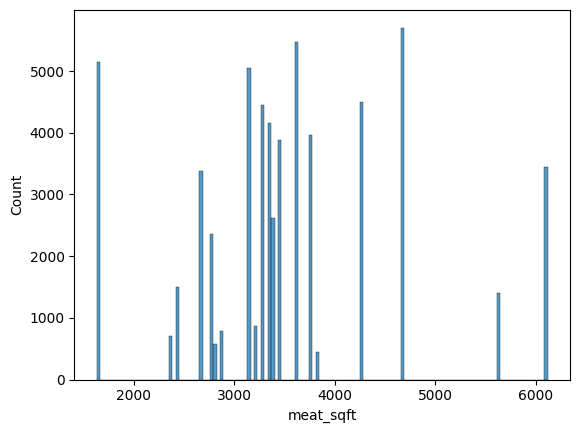

In [28]:
# some stores have really big frozen/meat sections, or a tiny one
sns.histplot(data=df, x='meat_sqft')
#sns.histplot(data=df, x='frozen_sqft')

In [29]:
# be wary of the columns that provide us with a lot of outliers in the analysis going forward

### 5. Create some important/relevant metrics as new columns

In [30]:
# are there always promotions? if not, can compare sales in no promo times to promo times 
df['promotion_name'].value_counts().head()

promotion_name
Weekend Markdown    2330
Two Day Sale        2321
Price Savers        2279
Price Winners       2108
Save-It Sale        2001
Name: count, dtype: int64

In [31]:
# column for tot store profit 
df['store_profit_mm']= df['store_sales_mm'] - df['store_cost_mm']

# column for store profit per unit 
df['unit_profit_mm']= df['store_profit_mm'] - df['unit_sales_mm']

In [32]:
df[['store_sales_mm','store_cost_mm','unit_profit_mm','store_profit_mm','unit_sales_mm']].head()

,store_sales_mm,store_cost_mm,unit_profit_mm,store_profit_mm,unit_sales_mm
0,7.36,2.7232,0.6368,4.6368,4.0
1,5.52,2.5944,-0.0744,2.9256,3.0
2,3.68,1.3616,0.3184,2.3184,2.0
3,3.68,1.1776,0.5024,2.5024,2.0
4,4.08,1.4280,-0.3480,2.6520,3.0


<Axes: xlabel='store_profit_mm', ylabel='Count'>

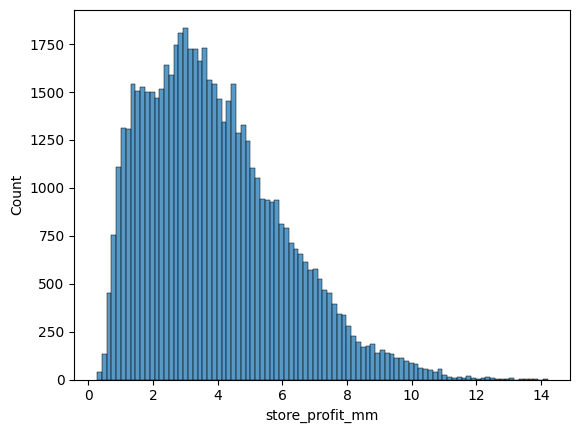

In [33]:
# makes sense that less store make higher profit, the mean is lower
sns.histplot(data=df, x='store_profit_mm')

### 6. Boxplots / Correlation / Pairplot for important numeric variables


In [34]:
numeric_columns

['store_sales_mm',
 'store_cost_mm',
 'unit_sales_mm',
 'total_children',
 'avg_cars',
 'num_children_at_home',
 'SRP',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

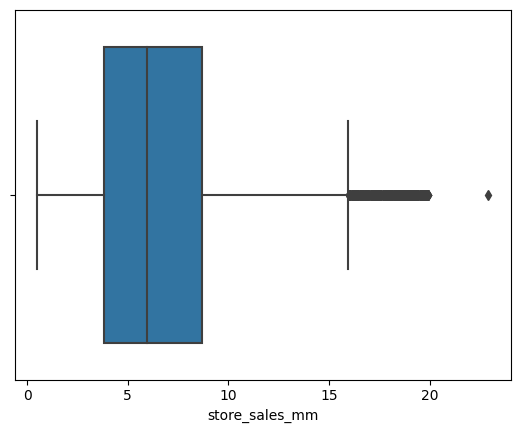

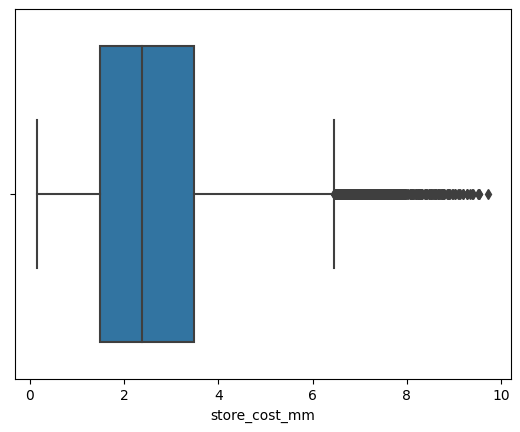

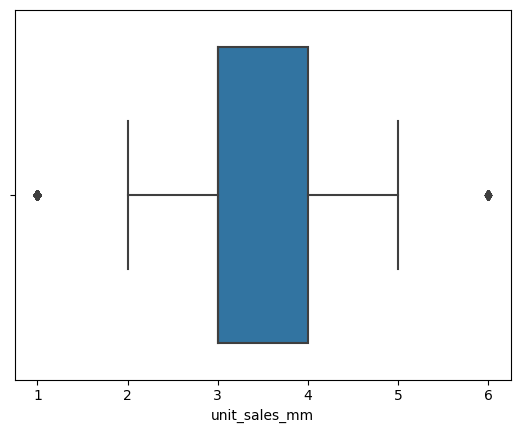

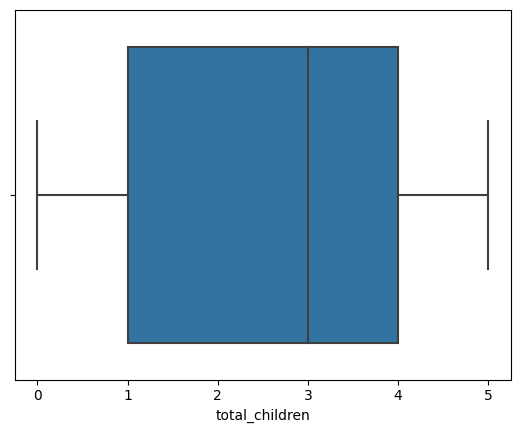

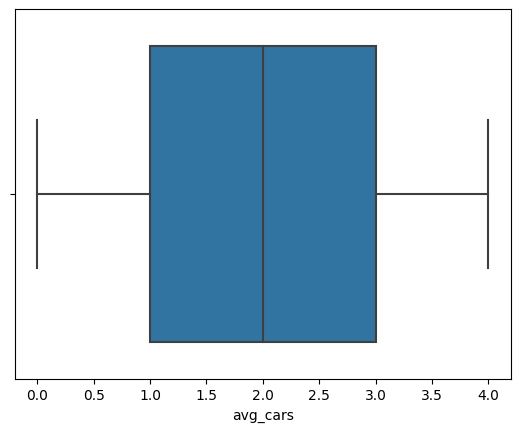

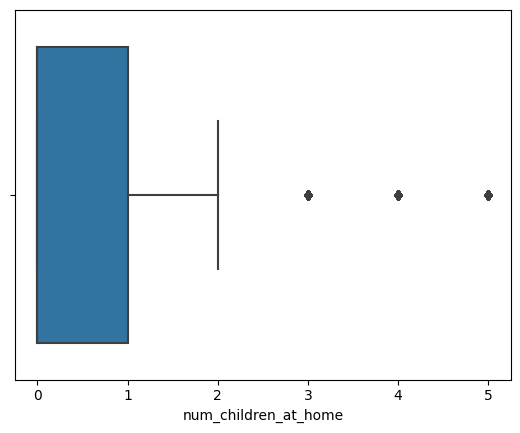

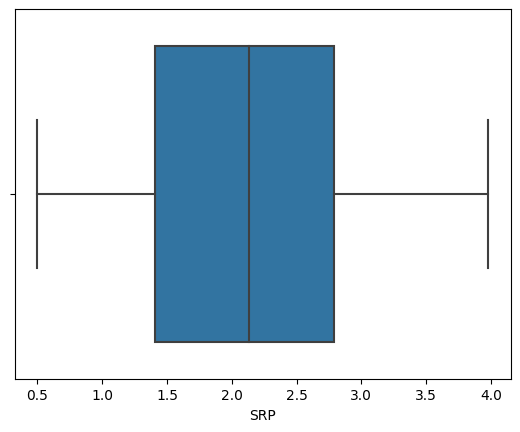

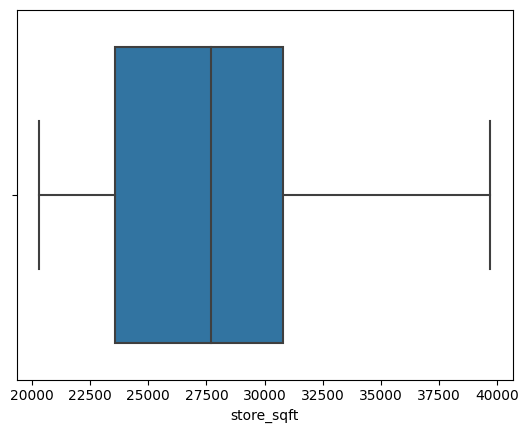

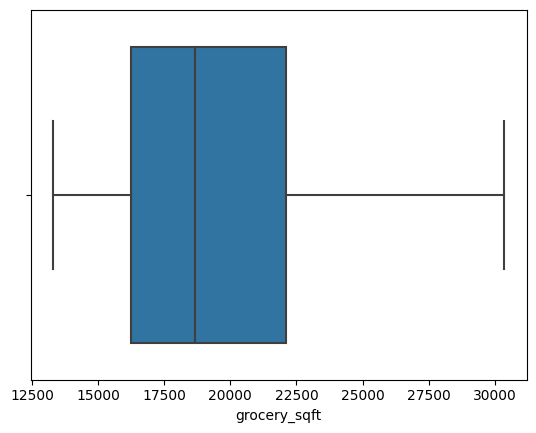

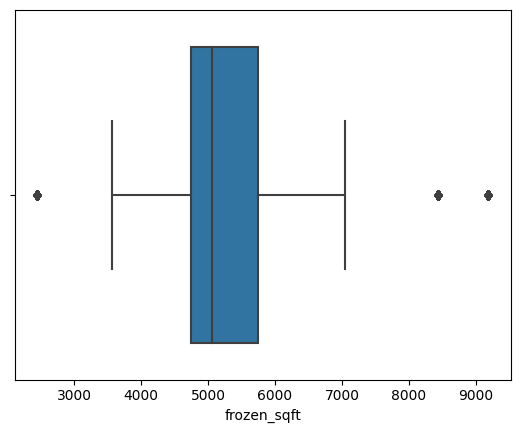

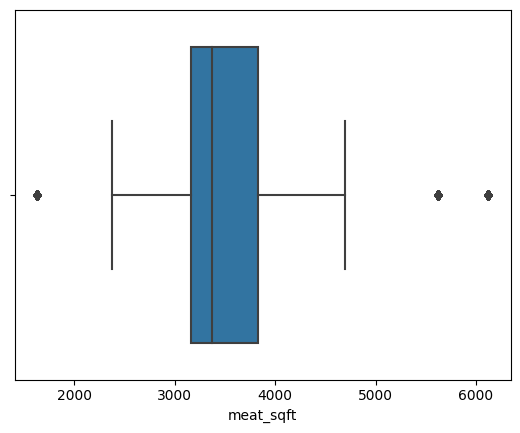

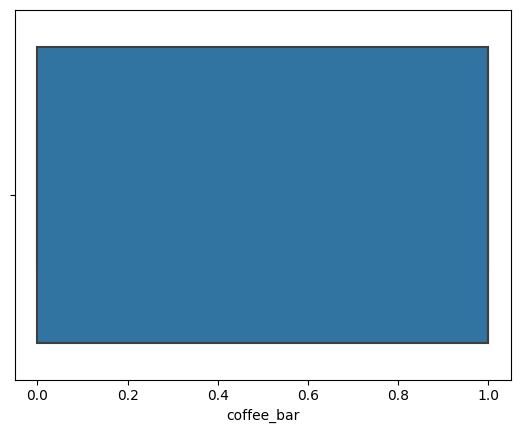

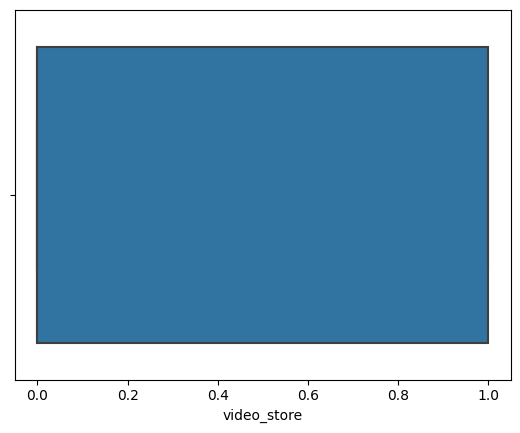

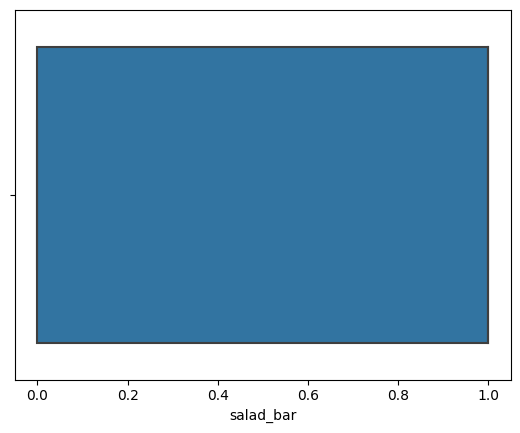

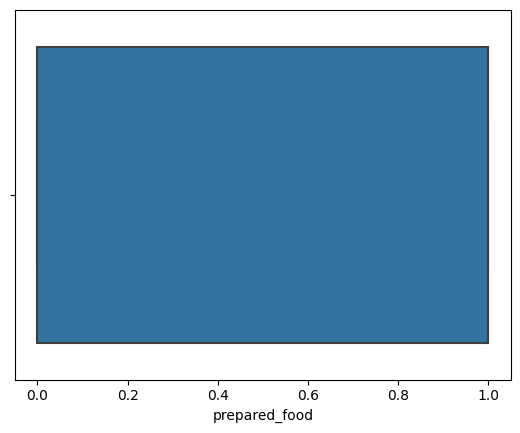

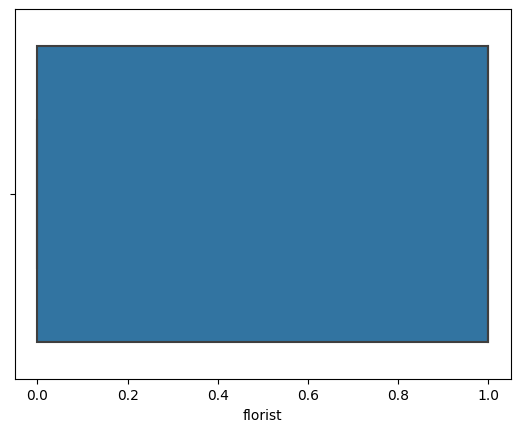

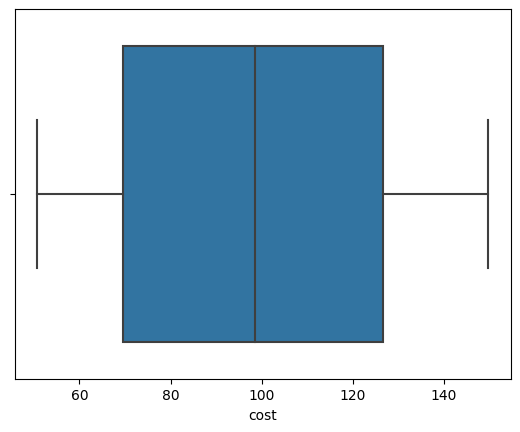

In [35]:
# look at distribution of the numeric variables 
for c in numeric_columns:
    sns.boxplot(data=df, x=c, orient='h') 
    plt.show()

# we see that:
binary_cols = [ 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


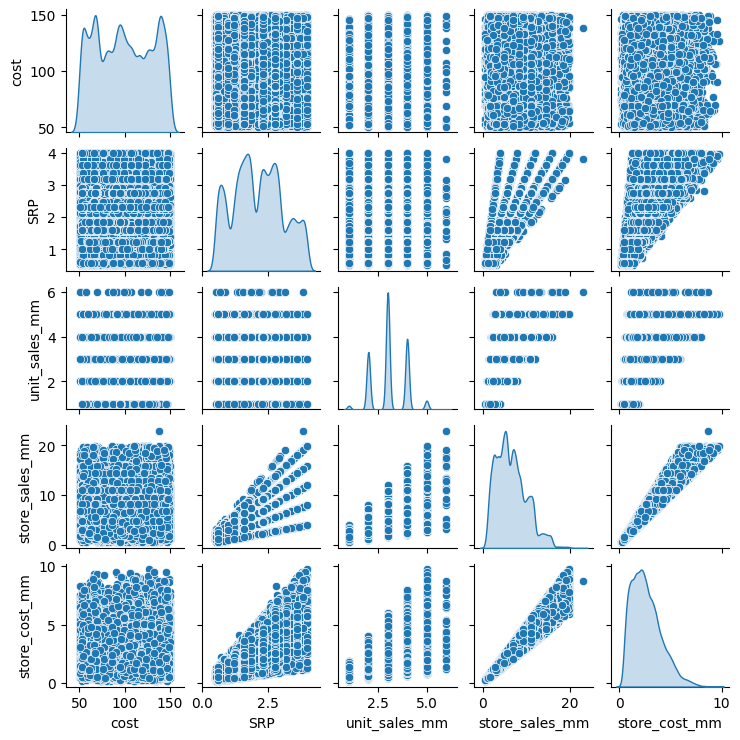

In [36]:
sns.pairplot(df[['cost', 'SRP', 'unit_sales_mm', 'store_sales_mm', 'store_cost_mm' ]],
             diag_kind='kde', height=1.5)

<Axes: >

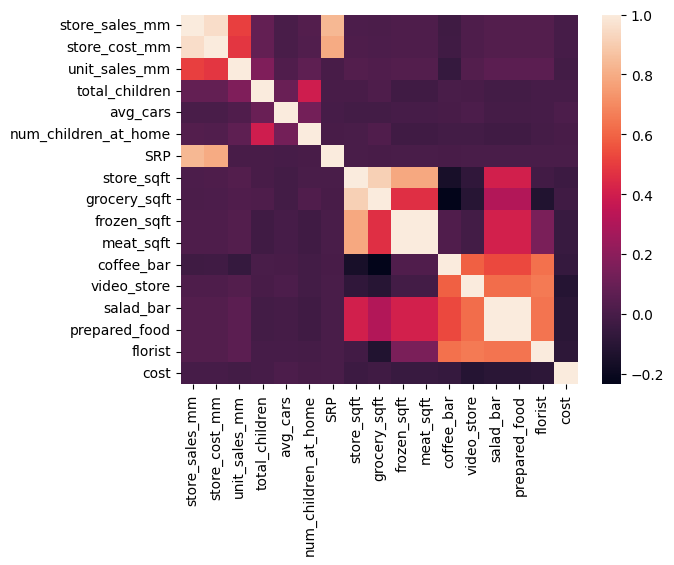

In [37]:
sns.heatmap(df[numeric_columns].corr())

/var/folders/8j/sh_q2r0160gcq1f0ttgf9z800000gn/T/ipykernel_3059/1352492925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


<Axes: xlabel='cost', ylabel='Density'>

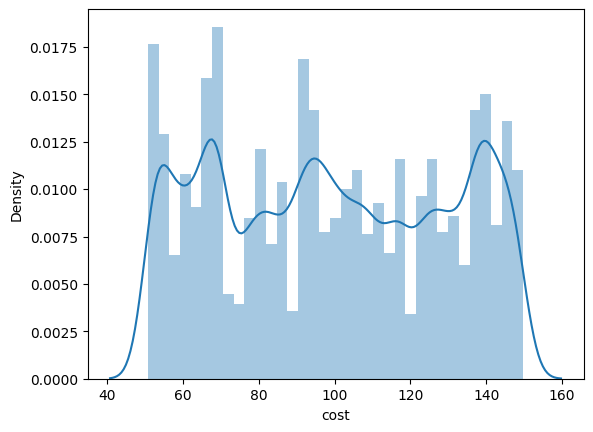

In [83]:
sns.distplot(df['cost'])

In [38]:
non_numeric_columns

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_ann_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

### 7. Guiding questions -- do some groupbys, look at distributions

#### Does it cost more to acquire people that make more annually?
cost: cost to acquire a customer

In [39]:
# no
(df.groupby('avg_ann_income')['cost'].sum() /  df.groupby('avg_ann_income')['avg_ann_income'].count()).sort_values()

avg_ann_income
$70K - $90K       98.014146
$130K - $150K     98.319229
$110K - $130K     98.909347
$150K +           99.129356
$10K - $30K       99.329848
$30K - $50K       99.434719
$90K - $110K      99.641838
$50K - $70K      100.065537
dtype: float64

#### Does it cost more to acquire people in different states by store type?

<Axes: xlabel='sales_country', ylabel='cost'>

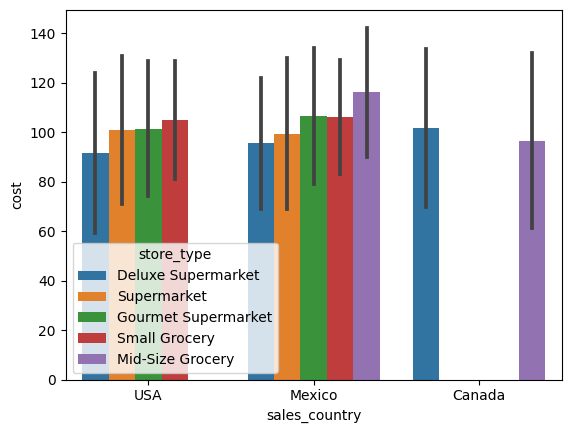

In [57]:
sns.barplot(data=df, x='sales_country', y='cost', hue='store_type', estimator='mean', errorbar='sd')

In [58]:
df.columns

Index(['food_category', 'food_department', 'food_family', 'store_sales_mm',
       'store_cost_mm', 'unit_sales_mm', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars', 'avg_ann_income',
       'num_children_at_home', 'brand_name', 'SRP', 'store_type', 'store_city',
       'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type', 'cost', 'store_profit_mm', 'unit_profit_mm', 'cluster'],
      dtype='object')

#### Within USA, largest store per state?

In [70]:
df[ df["sales_country"] == 'USA'].groupby('store_state')['store_sqft'].max()

store_state
CA    23688.0
OR    27694.0
WA    39696.0
Name: store_sqft, dtype: float64

#### In US states, what are the 3 stores with the most sales? 

In [69]:
df[df["store_state"].isin(['CA', 'OR', 'WA'])].nlargest(3, 'store_sales_mm')

,food_category,food_department,food_family,store_sales_mm,store_cost_mm,unit_sales_mm,promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,store_profit_mm,unit_profit_mm,cluster
32337,Canned Soup,Canned Foods,Food,19.9,6.368,5.0,Two Day Sale,USA,S,M,...,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",112.52,13.532,8.532,0
42493,Pain Relievers,Health and Hygiene,Non-Consumable,19.9,6.965,5.0,One Day Sale,USA,S,F,...,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio, TV",85.88,12.935,7.935,1
42575,Pain Relievers,Health and Hygiene,Non-Consumable,19.9,6.567,5.0,Green Light Special,USA,S,F,...,0.0,0.0,1.0,1.0,0.0,In-Store Coupon,123.02,13.333,8.333,0


#### Which store has the highest sales?

In [72]:
df[df["store_sales_mm"] == df.store_sales_mm.max()]

,food_category,food_department,food_family,store_sales_mm,store_cost_mm,unit_sales_mm,promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,store_profit_mm,unit_profit_mm,cluster
26755,Fruit,Produce,Food,22.92,8.7096,6.0,Bye Bye Baby,Canada,S,F,...,1.0,1.0,1.0,1.0,1.0,Sunday Paper,138.18,14.2104,8.2104,2


#### Are there specific brands that dominate sales?

In [77]:
df.groupby('brand_name')['store_sales_mm'].sum().sort_values(ascending=False).nlargest(10)

brand_name
Hermanos        13169.63
Tell Tale       11540.20
Ebony           11130.46
Tri-State       10665.58
High Top        10408.71
Nationeel       10231.83
Horatio         10133.52
Best Choice      9369.96
Fast             9178.11
High Quality     9036.66
Name: store_sales_mm, dtype: float64

### 8. Conclusion

Looks like higher store costs mean high Suggested Retail Prices (SRP) and higher store sales. Canada has the store with the highest sales and only seems to have Deluxe and Mid-Size grocery in this dataset. A few columns provide a lot of outliers such as number of children at home and square footage of meat/frozen sections in the stores so it will be good to look out for these columns biasing results when doing further analyses. 

### Practice Joining tables:

In [85]:
# create small lookup table for salutations just to practice joining tables 
sals = {
    'houseowner': ['Y', 'Y', 'N', 'N'],
    'gender': ['F', 'M', 'F', 'M'],
    'salutation': ['Mrs', 'Mr', 'Miss', 'Mister']
}

sals_df = pd.DataFrame(sals)

sals_df

,houseowner,gender,salutation
0,Y,F,Mrs
1,Y,M,Mr
2,N,F,Miss
3,N,M,Mister


In [99]:
#display number of people by salutations 

merged_df = df.merge(sals_df, on=['houseowner', 'gender'], how='left')
merged_df.groupby('salutation')[['houseowner', 'gender']].count()
                     

,houseowner,gender
salutation,,
Miss,12192,12192
Mister,11726,11726
Mr,17760,17760
Mrs,18750,18750
